<a href="https://colab.research.google.com/github/kulpritsec/Kaggle_practice/blob/main/kaggle_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install -q kaggle

In [18]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kulprit5","key":"8a10eff2870392e6b222777d57e09927"}'}

In [19]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [35]:
! chmod 600 ~/.kaggle/kaggle.json

In [36]:
! kaggle datasets list


ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          25177        702  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1768         45  1.0              
darshanprabhu09/stock-prices-for                                      Stock prices of Amazon , Microsoft , Google, Apple   85KB  2023-05-16 15:17:16           1532         38  1.0              
fatihb/coffee-quality-data-cqi

In [37]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [38]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [50]:
!ls

data_description.txt				 sample_submission.csv
house-prices-advanced-regression-techniques.zip  test.csv
kaggle.json					 train.csv
sample_data


Data Analysis -- 
1. data cleaning
2. EDA
3. data engineering
4. experimentation and parameter tuning
5. feature engineering
6. ensamble
7. submit for competition

In [76]:
#load libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [60]:
#load the data into train_data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [61]:
def create_table(train_data, table_id, title):
  html = f'<h3>{title}</h3>'
  html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
  html += train_data.to_html()
  html += '</div>'
  return html

In [62]:
numerical_features = train_data.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T

In [63]:
html_table = create_table(summary_stats, 'numberical_features', 'Summary stats for numerical features')

In [64]:
display(HTML(html_table))

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [65]:
category_features = train_data.select_dtypes(include=[object])
cat_summary_stats = category_features.describe().T
html_category = create_table(cat_summary_stats, 'category features','Summary stats for category features')
display(HTML(html_category))

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


NameError: ignored

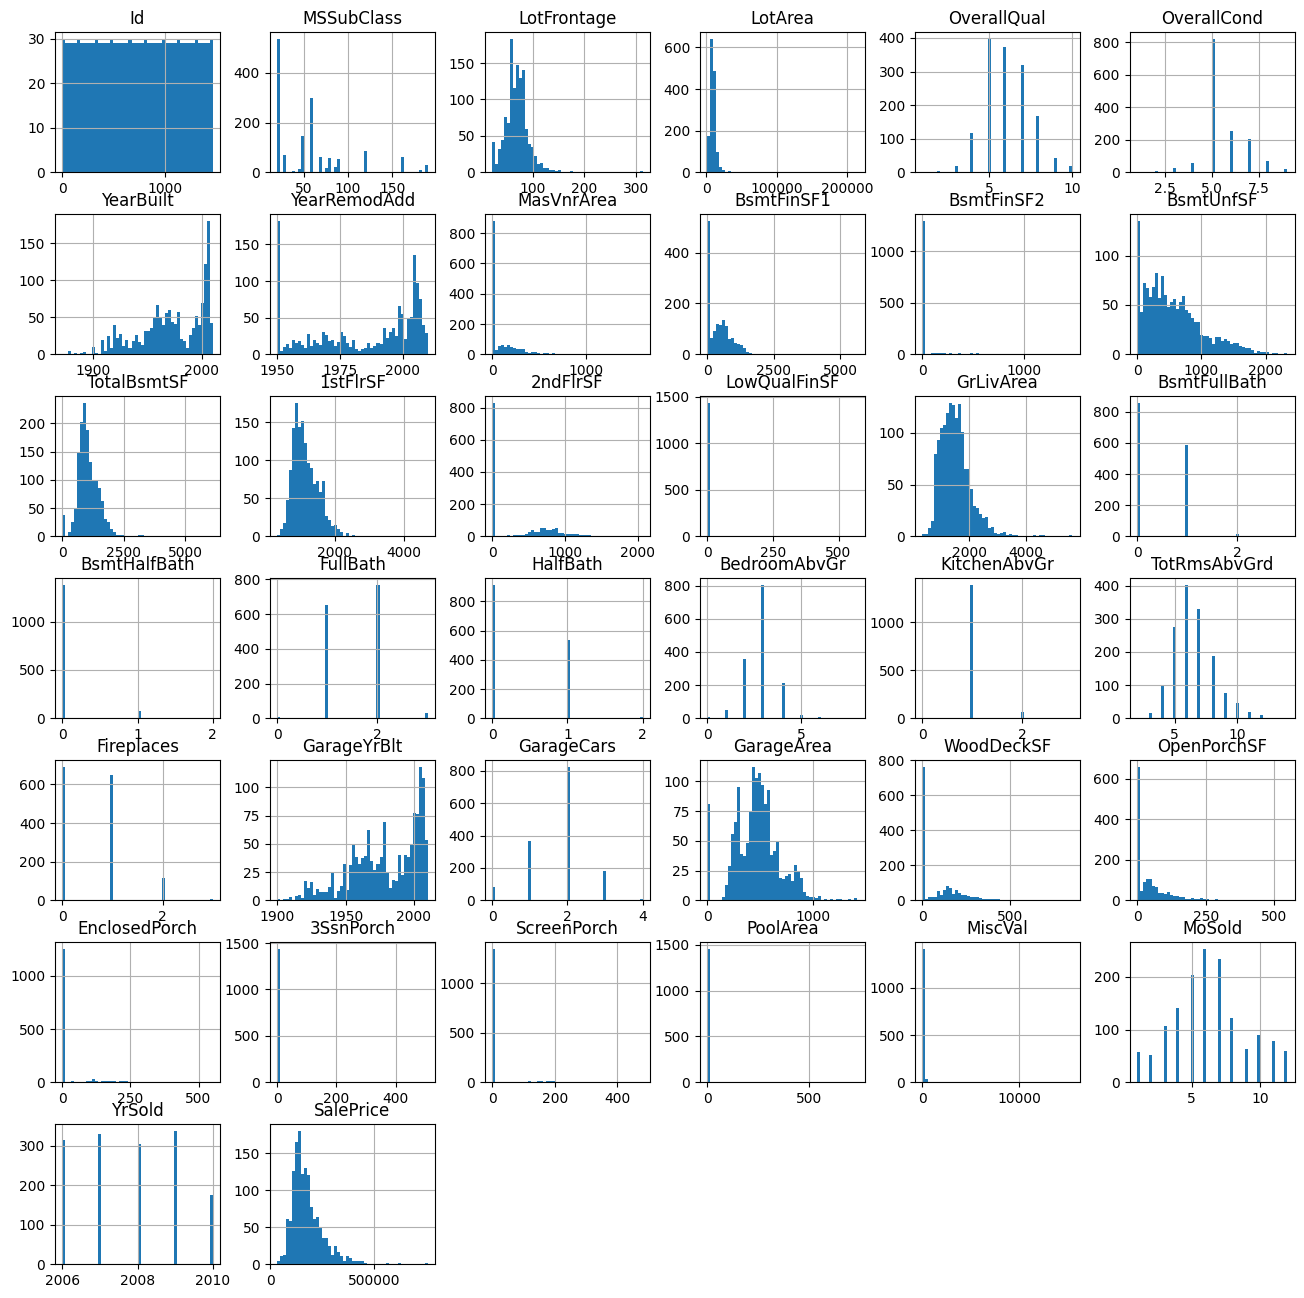

In [69]:
%matplotlib inline
train_data.hist(bins=50, figsize=(16,16))
plt.show()

In [66]:
#NULL VALUES
null_values = train_data.isnull().sum()
html_null = create_table(null_values.to_frame(), 'null values','null values in dataset')

missing_percent = (train_data.isnull().sum() /len(train_data)) * 100
html_missing = create_table(missing_percent.to_frame(), 'missing percent', 'missing values;')
display(HTML(html_null + html_missing))


,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [67]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [77]:
train_data.get("SalePrice").describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-74-98171fc43dfd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train_data.corr()


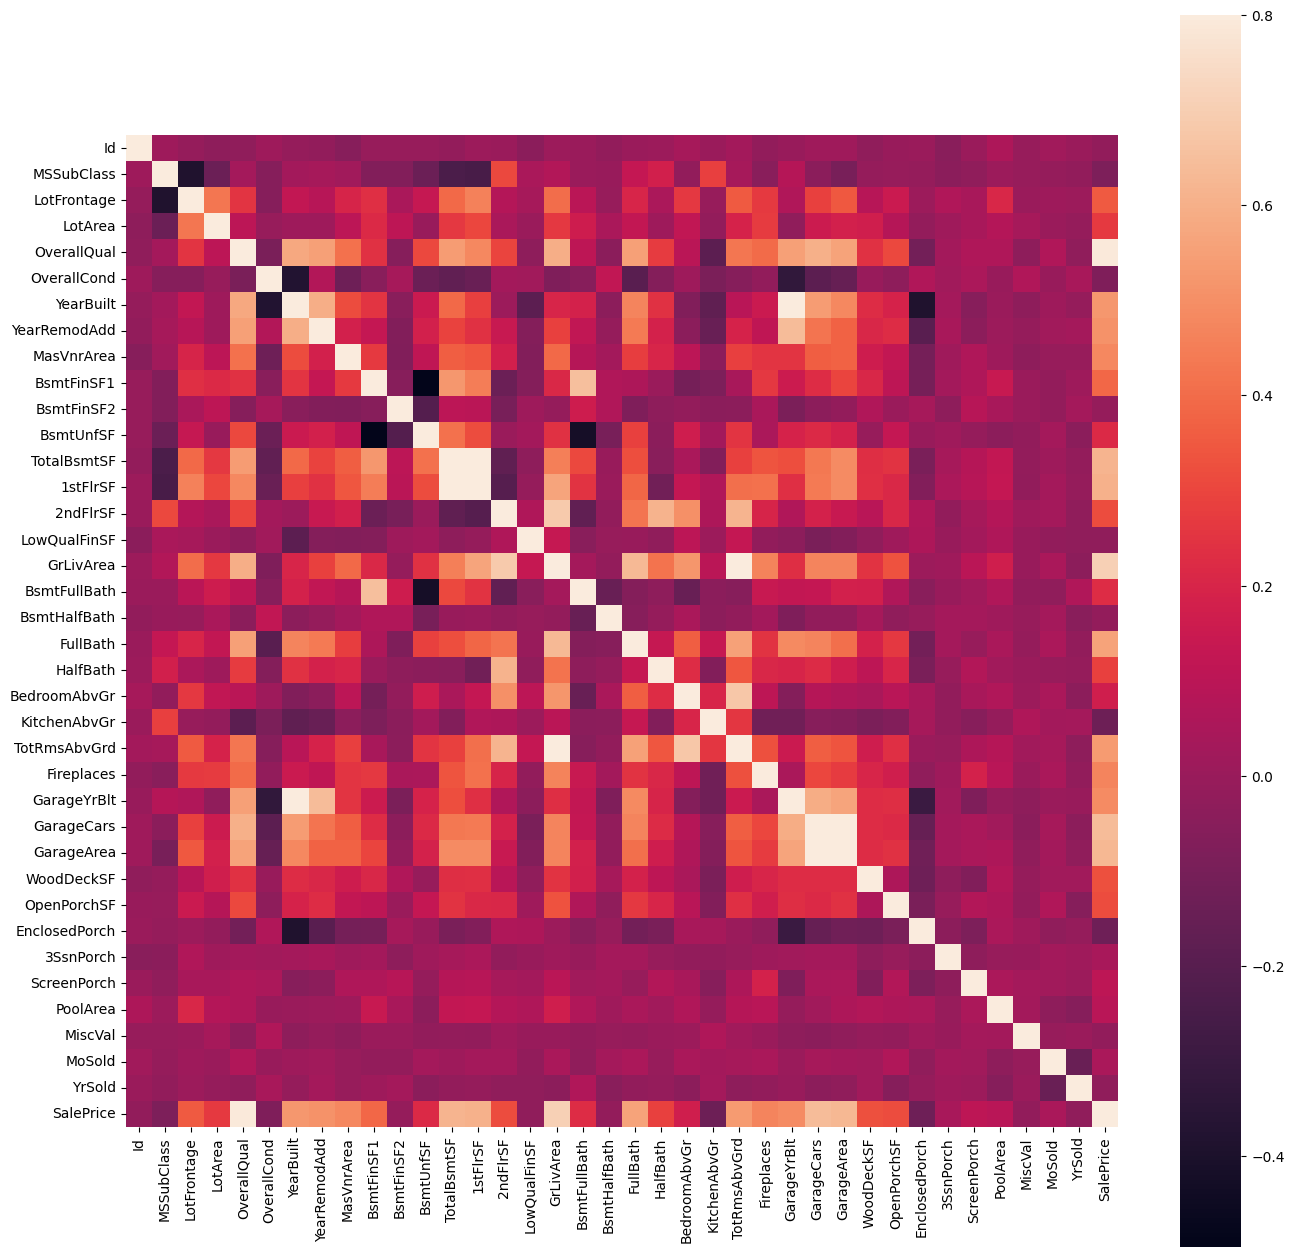

In [74]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

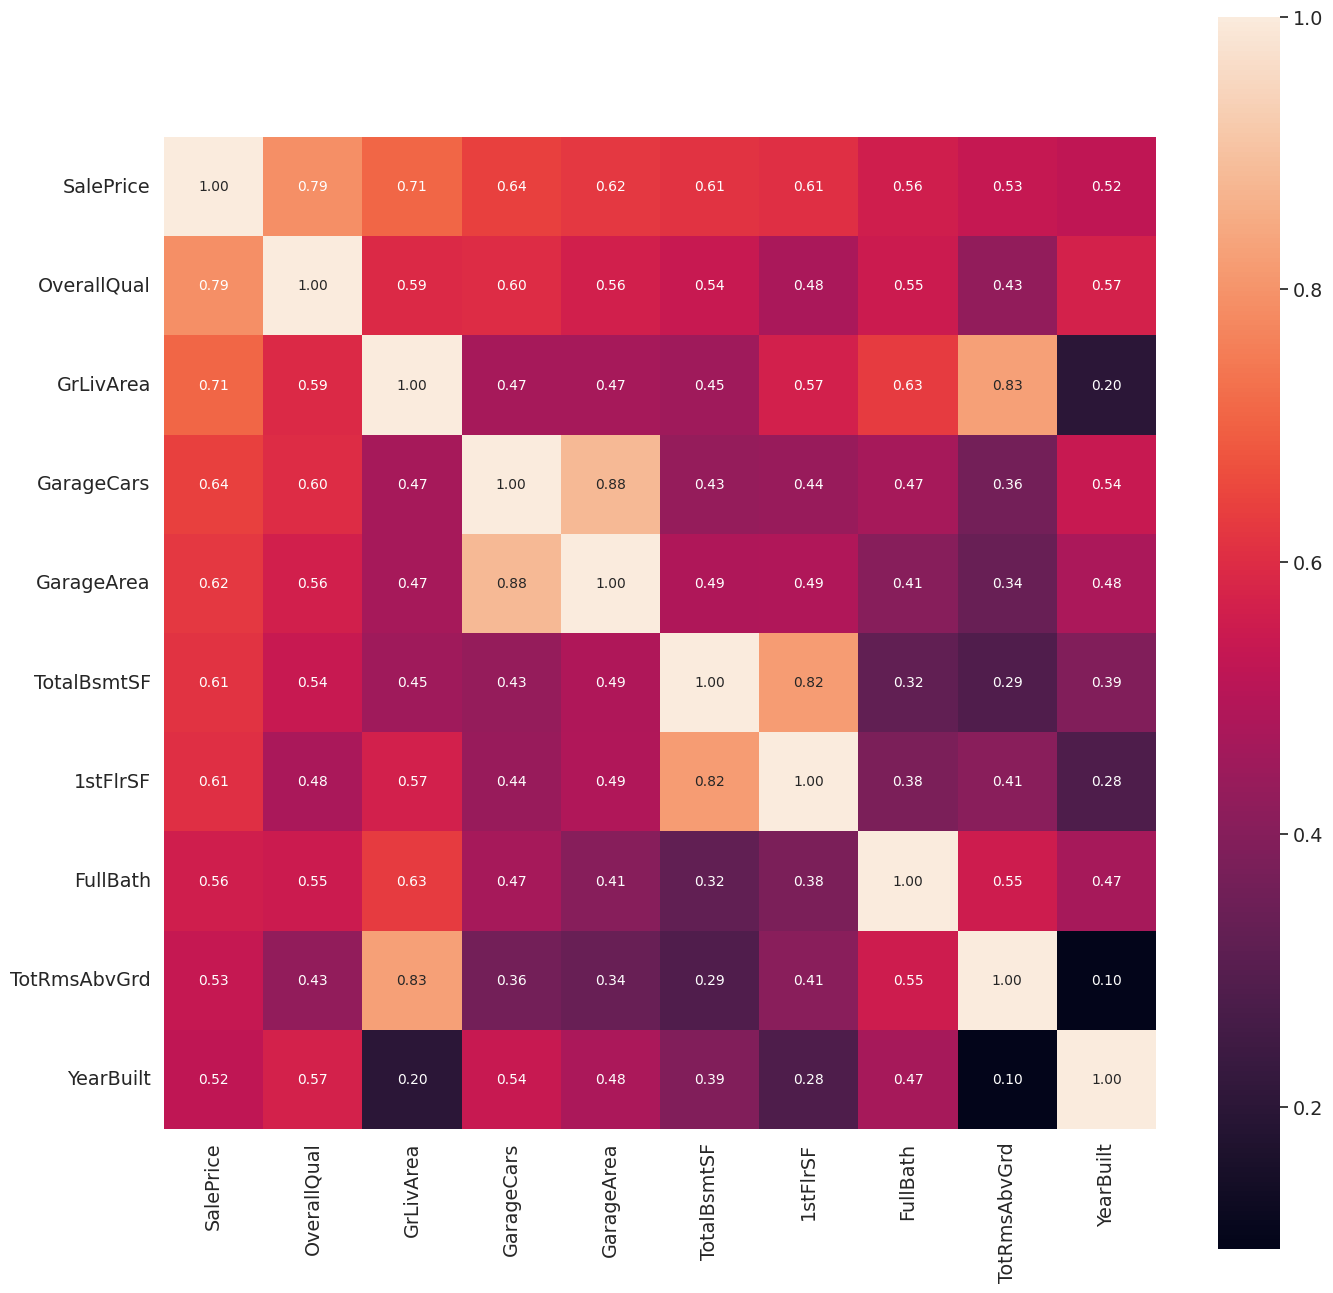

In [75]:
plt.figure(figsize=(16,16))
columns = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
correlation_matrix = np.corrcoef(train_data[columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [68]:
mu, sigma = stats.norm.fit(train_data['SalePrice'])
hist_data = go.Histogram(x=train_data['SalePrice'], nbinsx=50, name='historgam', opacity=0.75, histnorm='probability density')